Use KNearestNeighbourRegressor to Predict Price of House. 
Here is the dataset https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt

1. Use pandas to get some insights into the data (10 marks)

In [ ]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats
from matplotlib import pyplot as plt
from sklearn import metrics

%matplotlib inline

In [ ]:
#importing dataset from url
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [ ]:
df.reset_index(drop = True , inplace= True)
df = df.drop(['Unnamed: 0'], axis=1)
df.tail()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000
644,1376.946,6,7,3,2,1,36000


In [ ]:
df.tail()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000
644,1376.946,6,7,3,2,1,36000


In [ ]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [ ]:
print("Size of dataset is", df.size, "and shape of dataset is ", df.shape)

Size of dataset is 4515 and shape of dataset is  (645, 7)


In [ ]:
df.info

<bound method DataFrame.info of          Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  Price
0    1177.698      2           7        2            2         2  62000
1    2134.800      5           7        4            2         2  78000
2    1138.560      5           7        2            2         1  58000
3    1458.780      2           7        3            2         2  45000
4     967.776     11          14        3            2         2  45000
..        ...    ...         ...      ...          ...       ...    ...
640  1359.156      7          15        3            2         2  45000
641   377.148      4          10        1            1         1  24800
642   740.064     13          14        1            1         1  45000
643  1707.840      3          14        3            2         2  65000
644  1376.946      6           7        3            2         1  36000

[645 rows x 7 columns]>

In [ ]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [ ]:
df.corr()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


In [ ]:
#pre process
df.rename(columns = {"Living.Room" : "Living_room"} , inplace = True)

In [ ]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living_room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [ ]:
df.isnull().count()

Sqft           645
Floor          645
TotalFloor     645
Bedroom        645
Living_room    645
Bathroom       645
Price          645
dtype: int64

In [ ]:
#analysis for features
df['Sqft'].value_counts()

711.600     21
925.080     13
2134.800    11
1707.840    10
2063.640    10
            ..
1106.538     1
882.384      1
665.346      1
1209.720     1
1376.946     1
Name: Sqft, Length: 288, dtype: int64

In [ ]:
df['Price'].value_counts()

45000     47
55000     29
36000     25
50000     22
100000    17
          ..
41999      1
23800      1
65999      1
67000      1
24800      1
Name: Price, Length: 153, dtype: int64

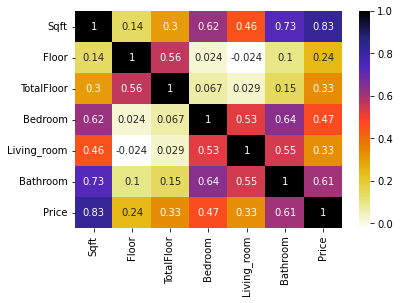

In [ ]:
#visualisation
sns.heatmap(df.corr(), annot = True ,cmap=plt.cm.CMRmap_r)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


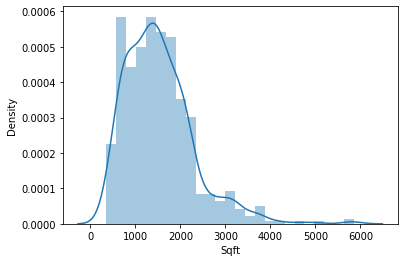

In [ ]:
sns.distplot(df['Sqft'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


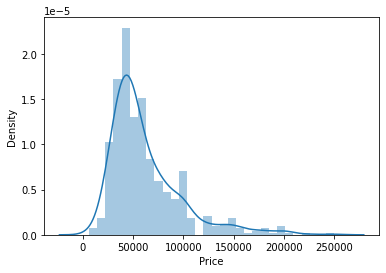

In [ ]:
sns.distplot(df['Price'])

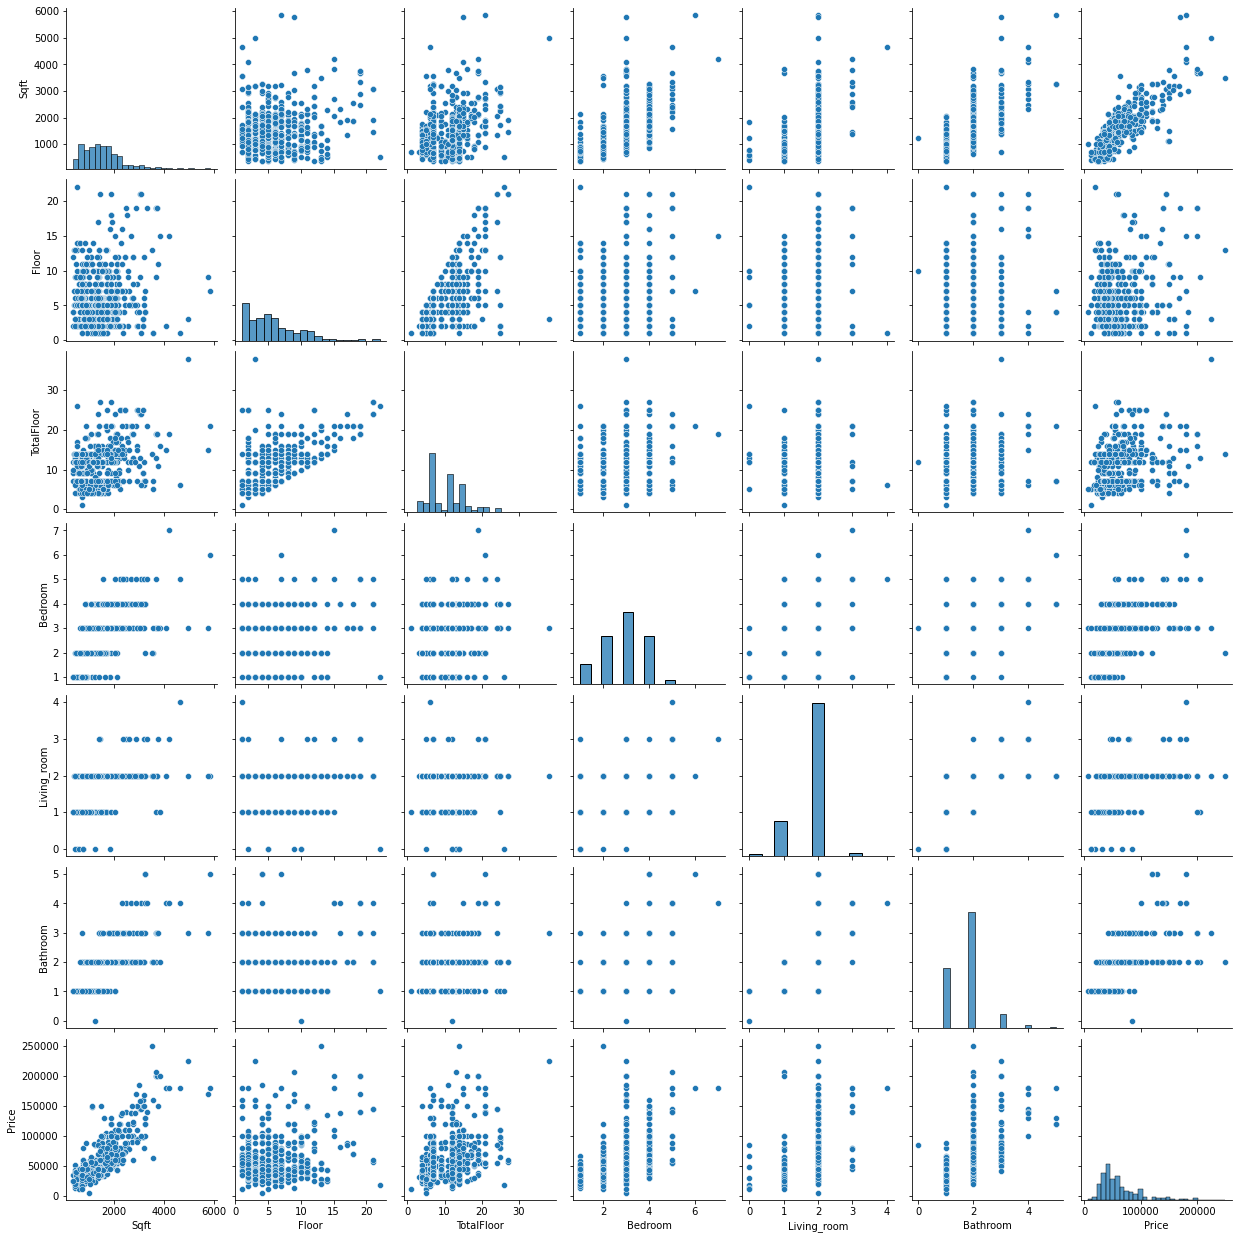

In [ ]:
sns.pairplot(df)

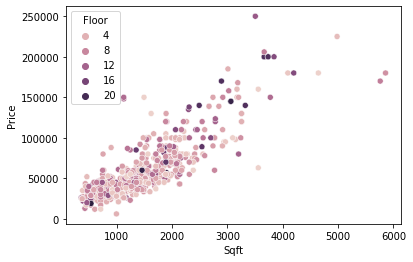

In [ ]:
sns.scatterplot(data = df, x = df['Sqft'], y = df['Price'], hue = 'Floor')

In [ ]:
#outlier detection and further pre processing
zsc = np.abs(stats.zscore(df))
print(zsc)
df = df[(zsc<3).all(axis =1 )]

         Sqft     Floor  TotalFloor   Bedroom  Living_room  Bathroom     Price
0    0.456393  1.014897    0.772347  0.828956     0.402694  0.276918  0.000370
1    0.791798  0.242042    0.772347  1.151328     0.402694  0.276918  0.449714
2    0.507434  0.242042    0.772347  0.828956     0.402694  1.187117  0.111966
3    0.089824  1.014897    0.772347  0.161186     0.402694  0.276918  0.477058
4    0.730160  1.303669    0.629803  0.161186     0.402694  0.276918  0.477058
..        ...       ...         ...       ...          ...       ...       ...
640  0.219747  0.273195    0.830110  0.161186     0.402694  0.276918  0.477058
641  1.500419  0.499660    0.171426  1.819099     1.761785  1.187117  1.044355
642  1.027127  1.818907    0.629803  1.819099     1.761785  1.187117  0.477058
643  0.234984  0.757279    0.629803  0.161186     0.402694  0.276918  0.084622
644  0.196547  0.015577    0.772347  0.161186     0.402694  1.187117  0.729814

[645 rows x 7 columns]


In [ ]:
df.shape

(608, 7)

In [ ]:
# Inititalising feature space and creating train test split
X = df.drop(labels = ['Price'] , axis = 1)
y = df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
# Scaling predictors
scaler = MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
#Testing data and k value for model
rmse_val=[]

for k in range(1,21):
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    error=np.sqrt(mean_squared_error(y_test,y_pred))
    
    rmse_val.append(error)
    
    print('rmse value for ',  k , 'is' ,error)

rmse value for  1 is 24340.80123568413
rmse value for  2 is 21641.64022861567
rmse value for  3 is 21663.9786608562
rmse value for  4 is 21271.84141343528
rmse value for  5 is 21093.308465000744
rmse value for  6 is 20996.788730498036
rmse value for  7 is 20639.936485746854
rmse value for  8 is 20496.545399153598
rmse value for  9 is 20412.439192682992
rmse value for  10 is 20501.712415384107
rmse value for  11 is 20342.804102884245
rmse value for  12 is 19941.382479945165
rmse value for  13 is 19941.936249030914
rmse value for  14 is 19934.173873060852
rmse value for  15 is 19922.448534584077
rmse value for  16 is 19866.92549650443
rmse value for  17 is 19673.493498837615
rmse value for  18 is 19831.17747265548
rmse value for  19 is 20162.924190527196
rmse value for  20 is 20233.166156190087


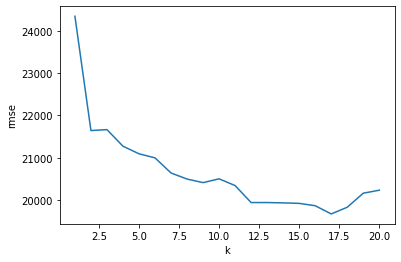

In [ ]:
k_range=range(1,21)
plt.plot(k_range,rmse_val)
plt.xlabel('k')
plt.ylabel('rmse')
plt.show()

In [ ]:
# at k = 2 we are getting min value  so for our model we will select k =2 as optimum value

In [ ]:
# Linear Regression

linear = LinearRegression(normalize=True)
linear.fit(X_train,y_train)
y_pred_linear = linear.predict(X_test)
scoreoflinear = linear.score(X_test,y_test)
scoreoflinear

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.5617583594578857

In [ ]:
y_pred_linear

array([ 66934.74029548,  28173.85860159,  71995.43647452,  53731.42424683,
        69079.78684883,  56848.8558595 ,  65397.82749015,  33715.76343316,
        45043.45039792,  43131.74861456, 113696.85368585,  40718.71091553,
        66290.9450635 ,  82545.87553423,  58820.31271126,  66934.74029548,
        36630.73287157,  66626.87263237,  66290.9450635 ,  53372.48138315,
        28104.5800521 ,  94446.10825033,  68910.87763611,  24114.32155519,
       112099.52588444,  73147.48607913,  26987.29407832,  42038.92451898,
        31005.12877732,  60283.26647824,  45929.11149425,  74069.48892321,
        76251.14611958,  59085.69883283,  29669.74924681,  47245.32571873,
        57759.9280696 ,  36863.72338357,  41154.46563124,  72094.81934819,
        37655.56715018,  48055.94289975,  60781.53191439,  44147.11171714,
        75635.79188516,  33687.74737177,  70019.22656922,  34233.8230567 ,
        42259.96175067, 109312.0204842 ,  43663.24573544,  72025.76832864,
        75094.14797693,  

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))



MAE: 14113.718697388666
MSE: 394677422.92964566
RMSE: 19866.489949904226
